# Proyecto: Comparación de la función `GROUP BY` de SQL y `.groupby` de pandas.

##  Mostraremos que las funciones de agrupamiento para de SQL y de pandas son equivalentes. La ventaja es que la sintaxis de pandas es más simple e intuitiva.

In [1]:
import matplotlib.pyplot as plt


import pandas as pd

# cargamos la libreria para conectar bases de datos tipo 'SQL'
import pymysql

# en caso de no tener la libreria, la podemos instalar con:
# pip install pymysql

## Creamos la conexion a la base de datos:

In [2]:
# Creamos la conexión con la base de datos usando el administrador 'MySQL':
conexion = pymysql.connect(
    host='127.0.0.1',#'localhost',
    port=3306, 
    user='root', 
    passwd='',  # <- password de la base de datos
    db='platzi' # <- nombre de la base de datos
    )

cursor = conexion.cursor()

## Información de la base de datos:

### El Schema `platzi` tiene 2 tablas `alumnos` y `carreras`

## Hacemos consultas en lenguaje SQL y las convertimos a DataFrames de pandas:

In [3]:
# Extraemos todos los campos de la tabla 'alumnos':
query1 = '''
SELECT * 
FROM platzi.alumnos;
'''

cursor.execute(query1)

# Pasamos la consulta a un DataFrame:
df1 = pd.read_sql(query1, conexion)
df1.head()

,id,nombre,apellido,email,colegiatura,fecha_incorporacion,carrera_id,tutor_id
0,1,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,23,9
1,2,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,40,26
2,3,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,48,25
3,4,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,36,14
4,5,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,14,7


## Uso del histograma para realizar conteos 

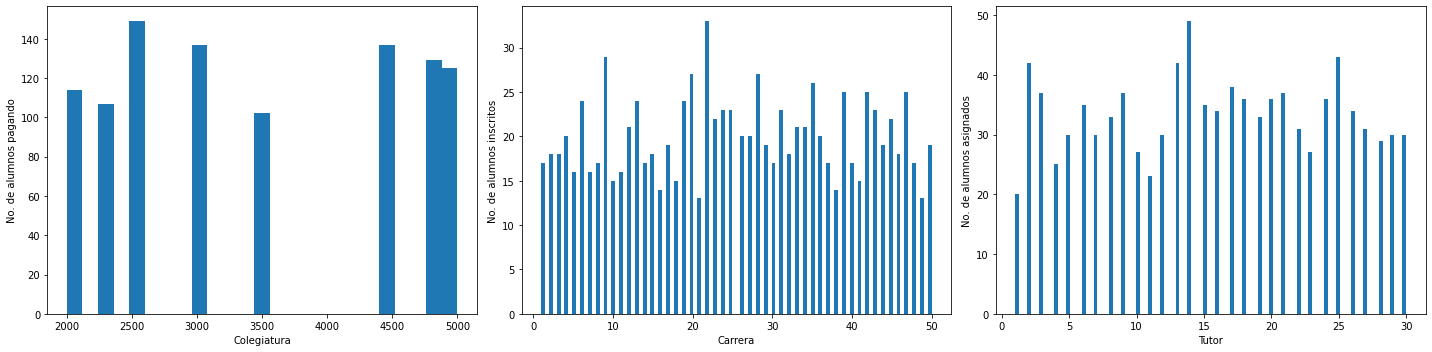

In [4]:
plt.figure( figsize = (20,5) )

plt.subplot(1, 3, 1)
plt.hist( df1['colegiatura']  , bins=25)
plt.xlabel('Colegiatura')
plt.ylabel('No. de alumnos pagando')


plt.subplot(1, 3, 2)
plt.hist( df1['carrera_id']  , bins=100)
plt.xlabel('Carrera')
plt.ylabel('No. de alumnos inscritos')

plt.subplot(1, 3, 3)
plt.hist( df1['tutor_id']  , bins=100)
plt.xlabel('Tutor')
plt.ylabel('No. de alumnos asignados')

plt.tight_layout() # evita que se sobrepongan las imágenes
plt.show()

## Consultando el número de alumnos por cada tipo de colegiatura usando GROUP BY de SQL

In [5]:
query2 = '''
SELECT colegiatura AS cuotas, count(*) AS N_alumnos 
FROM platzi.alumnos
GROUP BY cuotas
ORDER BY cuotas;
'''

cursor.execute(query2)

# Pasamos la consulta a un DataFrame:
df_q2 = pd.read_sql(query2, conexion)
df_q2

,cuotas,N_alumnos
0,2000.0,114
1,2300.0,107
2,2500.0,149
3,3000.0,137
4,3500.0,102
5,4500.0,137
6,4800.0,129
7,5000.0,125


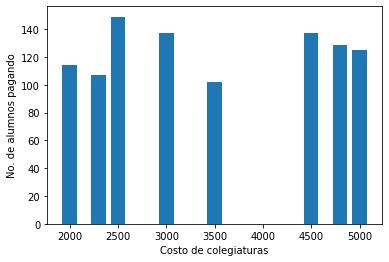

In [6]:
plt.figure()
plt.bar(df_q2['cuotas'], df_q2['N_alumnos'] , width=150)
plt.xlabel('Costo de colegiaturas')
plt.ylabel('No. de alumnos pagando')
plt.show()

## Consultando el número de alumnos por cada tipo de colegiatura usando GROUP BY de Pandas

In [7]:
# Consultando el número de alumnos por cada tipo de colegiatura

df2 = df1.groupby( ['colegiatura'] )[ ['id'] ].count()
df2
# Explicación de la sentencia:
# 1.- Seleccionamos el DataFrame: df1
# 2.- Seleccionamos la columna(s) sobre la que agruparemos la información: .groupby( ['colegiatura'] )
# 3.- Elegimos la(s) columna(s) que queremos analizar: [['id']]
# 4.- Aplicamos alguna función a la información agrupada: .count()

,id
colegiatura,
2000.0,114
2300.0,107
2500.0,149
3000.0,137
3500.0,102
4500.0,137
4800.0,129
5000.0,125


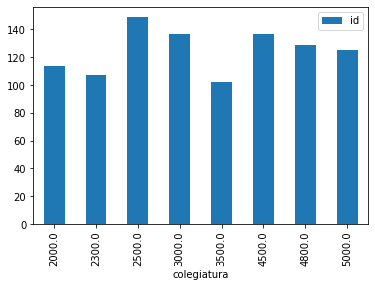

In [8]:
df2.plot(kind = 'bar')
plt.show()

## Consultando el número de alumnos en cada tipo de carrera usando GROUP BY de SQL


In [9]:
query3 = '''
SELECT carrera_id AS Carrera, count(*) AS N_alumnos 
FROM platzi.alumnos
GROUP BY Carrera
ORDER BY Carrera;
'''

cursor.execute(query3)

# Pasamos la consulta a un DataFrame:
df_q3 = pd.read_sql(query3, conexion)
df_q3.head(10)

,Carrera,N_alumnos
0,1,17
1,2,18
2,3,18
3,4,20
4,5,16
5,6,24
6,7,16
7,8,17
8,9,29
9,10,15


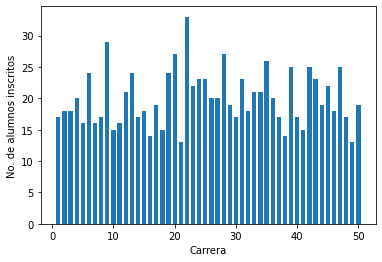

In [10]:
plt.figure()
plt.bar(df_q3['Carrera'], df_q3['N_alumnos'] , width=0.7)
plt.xlabel('Carrera')
plt.ylabel('No. de alumnos inscritos')
plt.show()

## Consultando el número de alumnos en cada tipo de carrera usando GROUP BY de Pandas


In [11]:
# Consultando el número de alumnos en cada tipo de carrera

df3 = df1.groupby( ['carrera_id'] )[['id']].count()
df3.head(10) #<-- mostramos los primeros N registros

# Explicación de la sentencia:
# 1.- Seleccionamos el DataFrame: df1
# 2.- Seleccionamos la columna(s) sobre la que agruparemos la información: .groupby( ['carrera_id'] )
# 3.- Elegimos la(s) columna(s) que queremos analizar: [['id']]
# 4.- Aplicamos alguna función a la información agrupada: .count()

,id
carrera_id,
1,17
2,18
3,18
4,20
5,16
6,24
7,16
8,17
9,29


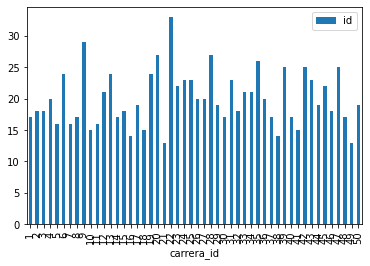

In [12]:
df3.plot(kind = 'bar')
plt.show()

### Consultamos las carreras con mayor y menor demanda

In [13]:
# Consultamos las carreras con mayor demanda:
max_d = df3['id'].max()

df3[ df3['id'] == max_d ]

,id
carrera_id,
22,33


In [14]:
# Consultamos las carreras con menor demanda:
min_d = df3['id'].min()

df3[ df3['id'] == min_d ]

,id
carrera_id,
21,13
49,13


## Consultando el número de alumnos asignados a cada tuto usando GROUP BY de SQL

In [15]:
query4 = '''
SELECT tutor_id AS Tutor, count(*) AS N_alumnos 
FROM platzi.alumnos
GROUP BY Tutor
ORDER BY Tutor;
'''

cursor.execute(query3)

# Pasamos la consulta a un DataFrame:
df_q4 = pd.read_sql(query4, conexion)
df_q4#.head(10)

,Tutor,N_alumnos
0,1,20
1,2,42
2,3,37
3,4,25
4,5,30
5,6,35
6,7,30
7,8,33
8,9,37
9,10,27


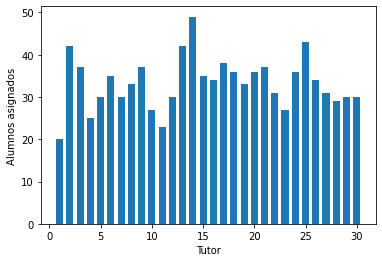

In [16]:
plt.figure()
plt.bar(df_q4['Tutor'], df_q4['N_alumnos'] , width=0.7)
plt.xlabel('Tutor')
plt.ylabel('Alumnos asignados')
plt.show()

## Consultando los registros de las carreras más costosas

In [17]:
# Consulta de registros correspondientes a las carreras más costosas:
max_coleg = df1['colegiatura'].max()
df1[ df1['colegiatura'] == max_coleg ]

,id,nombre,apellido,email,colegiatura,fecha_incorporacion,carrera_id,tutor_id
0,1,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,23,9
8,9,Terencio,None,twadhams8@dot.gov,5000.0,2020-04-08 04:46:33,24,22
10,11,Terri,Piercy,tpiercya@a8.net,5000.0,2019-05-31 03:36:39,31,17
17,18,Franklyn,China,fchinah@netvibes.com,5000.0,2018-08-18 00:58:48,14,25
18,19,Shir,Dionisetto,sdionisettoi@google.com,5000.0,2019-05-31 04:49:29,35,24
...,...,...,...,...,...,...,...,...
922,923,Lyndsay,Axtell,laxtellpm@posterous.com,5000.0,2020-03-17 12:46:23,22,27
956,957,Giuseppe,Tackley,gtackleyqk@mit.edu,5000.0,2018-11-27 04:46:15,4,25
989,990,Katherine,Kohnert,kkohnertrh@cargocollective.com,5000.0,2018-08-01 20:58:30,39,11
994,995,Elihu,O'Shevlin,eoshevlinrm@who.int,5000.0,2017-12-26 00:44:24,22,18
